Melakukan Operasi Image Filtering dengan OpenCV
1. Low-Pass Filtering

OpenCV memiliki berbagai operasi yang dapat digunakan untuk proses filtering, diantaranya: Averaging, Gaussian, Median filter dan Billateral filtering. Pada bagian ini akan dilakukan beberapa percobaan menggunakan fungsi-fungsi OpenCV untuk melakukan Image Filtering. Gunakan data yang diberikan sebagai latihan, atau gunakan gambar yang dapat kalian temukan dari internet.

Sebagai latihan pertama, akan dilakukan filtering pada gambar cat.jpg dengan menggunakan kernel berupa matriks berukuran [5x5] sebagai berikut:

In [1]:
# memanggil modul yang diperlukan
import cv2
import numpy as np
from matplotlib import pyplot as plt
#jika menggunakan google colab jgn lupa load code di bawah ini
#from google.colab.patches import cv2_imshow


#bgr
img = cv2.imread('cat.jpg')

#rgb
cat = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# tampilkan gambar awal tanpa filter
cv2.imshow('Gambar Asli',img)


# membuat filter: matriks berukuran 5 x 5 
kernel = np.ones((5,5),np.float32)/25
print(kernel)

# lakukan filtering
kucing_filter = cv2.filter2D(img,-1,kernel)

cv2.imshow('Gambar Filter',kucing_filter)

# salt and pepper

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


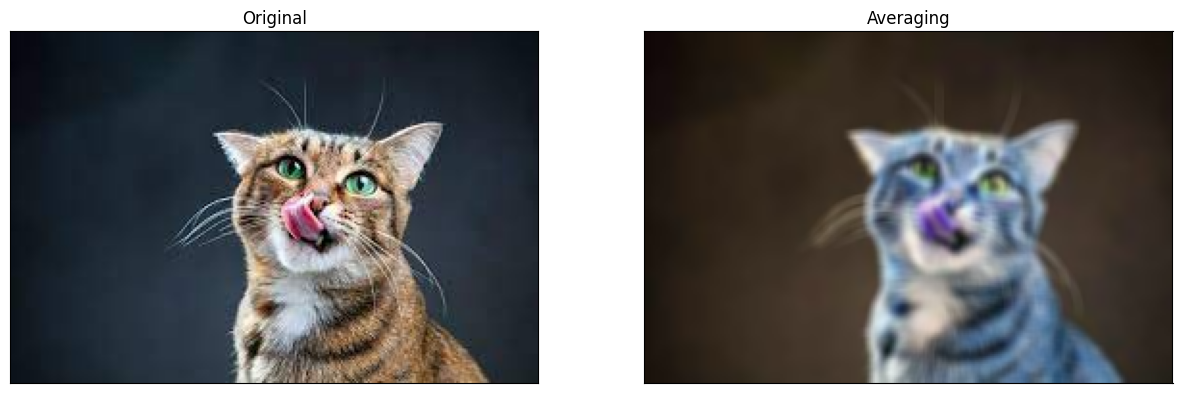

In [2]:
# perbesar ukuran hasil plotting jika diperlukan
plt.rcParams["figure.figsize"] = (15,15)

# plot pertama, gambar asli
plt.subplot(121),plt.imshow(cat),plt.title('Original')
plt.xticks([]), plt.yticks([])

# kedua, hasil filter
plt.subplot(122),plt.imshow(kucing_filter),
plt.title('Averaging')
plt.xticks([]), plt.yticks([])

# Plot!
plt.show()

In [3]:
kucing_blur = cv2.blur(img,(5,5))

cv2.imshow('Gambar blur',kucing_blur)

In [4]:
# ini adalah cara lain untuk membuat sebuah kernel, 
# yaitu dengan menggunakan np.matrix
# kali ini, ukuran matriksnya 3 x 3
kernel = np.matrix([
          [1, 1, 1],
          [1, 2, 1],
          [1, 1, 1]         
          ])/25
print(kernel)

# buat lagi filteringnya
kucing_filter = cv2.filter2D(img,-1,kernel)

# tampilkan
cv2.imshow('Gambar filter',kucing_filter)

[[0.04 0.04 0.04]
 [0.04 0.08 0.04]
 [0.04 0.04 0.04]]


2. High-Pass Filtering

Pada contoh Averaging di atas kita menggunakan kernel dalam bentuk matriks. Sejauh ini kita melakukan operasi citra dengan menganggap tiap band citra merupakan domain matriks yang terdiri dari baris dan kolom. Sejatinya, kita juga dapat merepresentasikan sebuah citra sebagai fungsi matematika yang tersusun dari beberapa parameter.

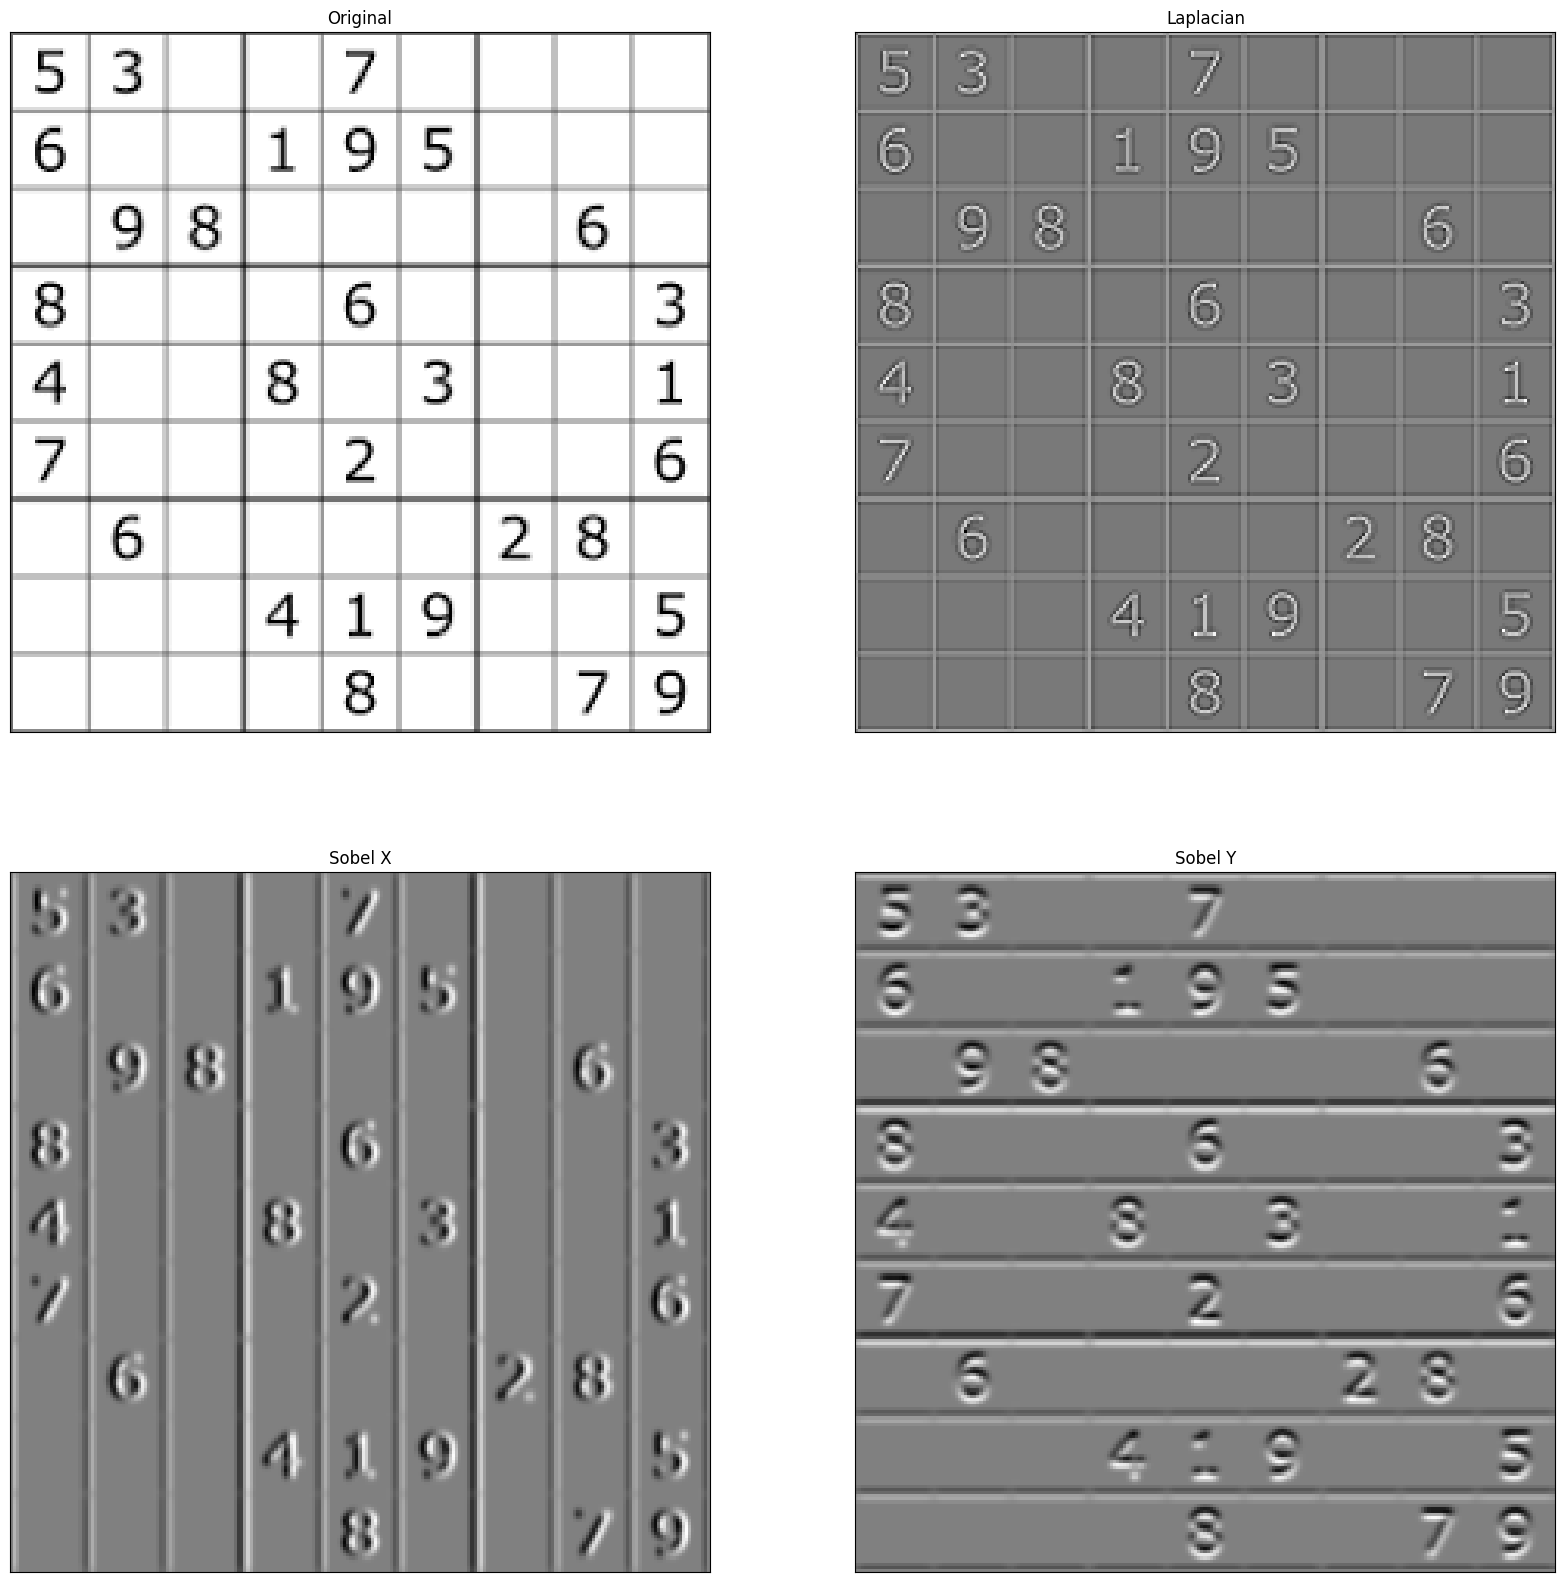

In [5]:
# Highpass Filter

# sebenarnya kita tidak perlu melakukan filtering lagi. Cukup sekali saja 
# di bagian awal, selama notebook ini tetap terhubung
import cv2
import numpy as np
from matplotlib import pyplot as plt


# memanggil citra sebagai grayscale (argument 0)
img = cv2.imread('sudoku.jpg',0)

# menerapkan algoritma high-pass filtering:
# laplacian
laplacian = cv2.Laplacian(img,cv2.CV_64F)

# sobel dengan ukuran kernel 5
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

# Catatan:
# CV_64F pada contoh di atas menunjukkan nilai bit dari citra 
# yang dihasilkan serta tipe datanya (F = Float)

# perbesar ukuran hasil plotting 
plt.rcParams["figure.figsize"] = (20,20)


# menampilkan hasil filter
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

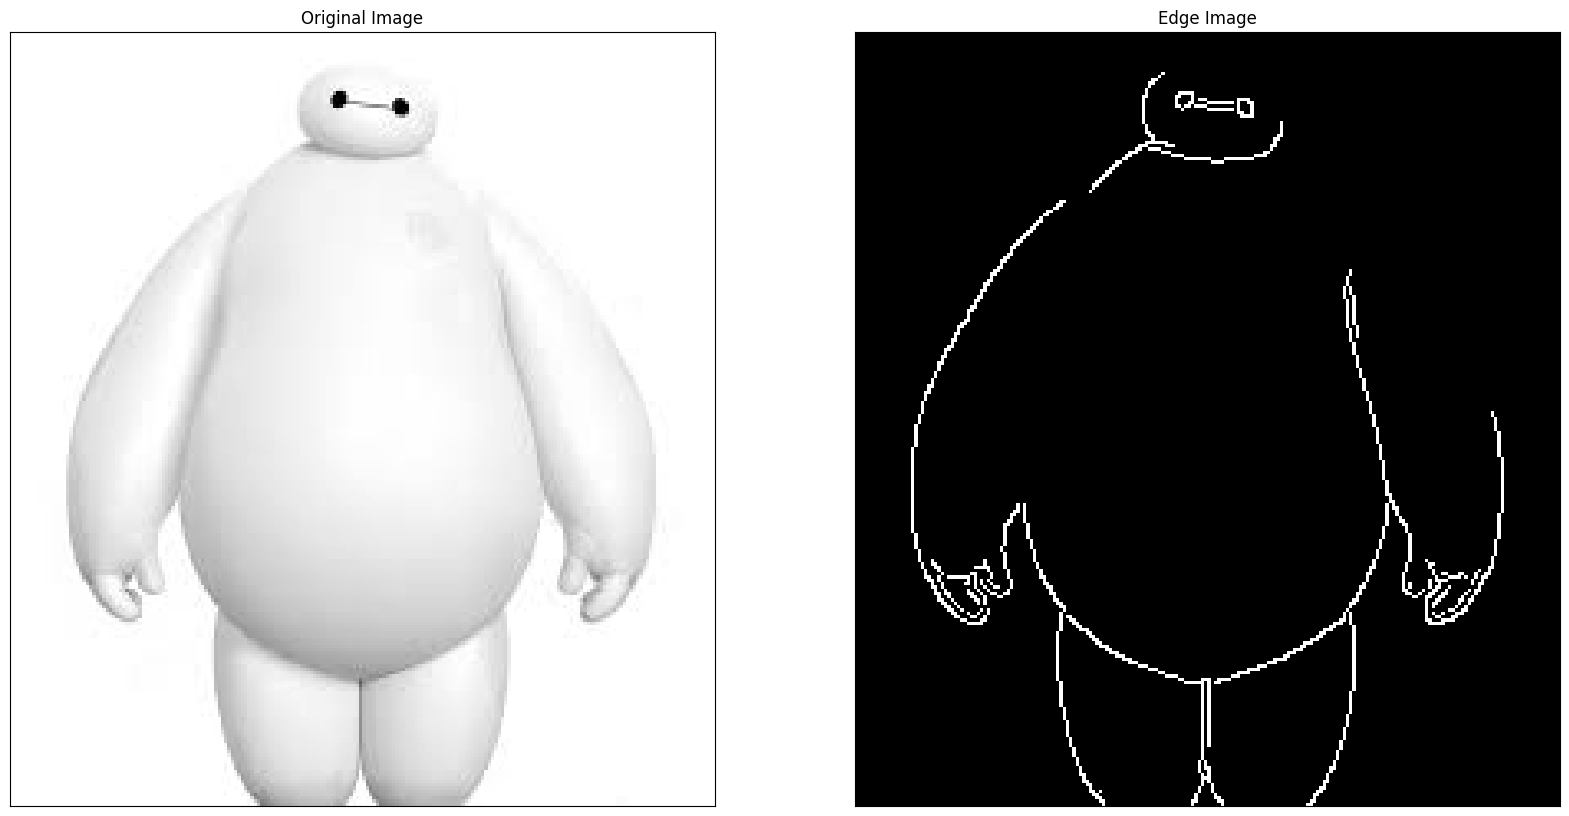

In [6]:
# memanggil citra sebagai grayscale (argument 0)
img = cv2.imread('baymax.jpg',0)

# memanggil fungsi Canny Edges dengan argument (citra, nilai_min, nilai_max)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

Menggunakan OpenCV untuk Thresholding
OpenCV memiliki beberapa fungsi untuk Thresholding. Binary Thresholding barangkali adalah yang paling sederhana dan banyak digunakan untuk memisahkan antara objek dengan gambar latar. Berikut adalah contoh bagaimana melakukan thresholding dengan OpenCV

# membaca gambar baymax 
img = cv2.imread('baymax.jpg',0)

# Hitungan threshold. 
# Perhatikan nilai ambang batas bawah dan atas dari tiap fungsi 
# yang diberikan
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

# menampilkan hasil
titles = ['Gambar asli','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

# menampilkan beberapa gambar sekaligus
for i in range(6):
    # 3 baris, 2 kolom
    plt.subplot(3,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

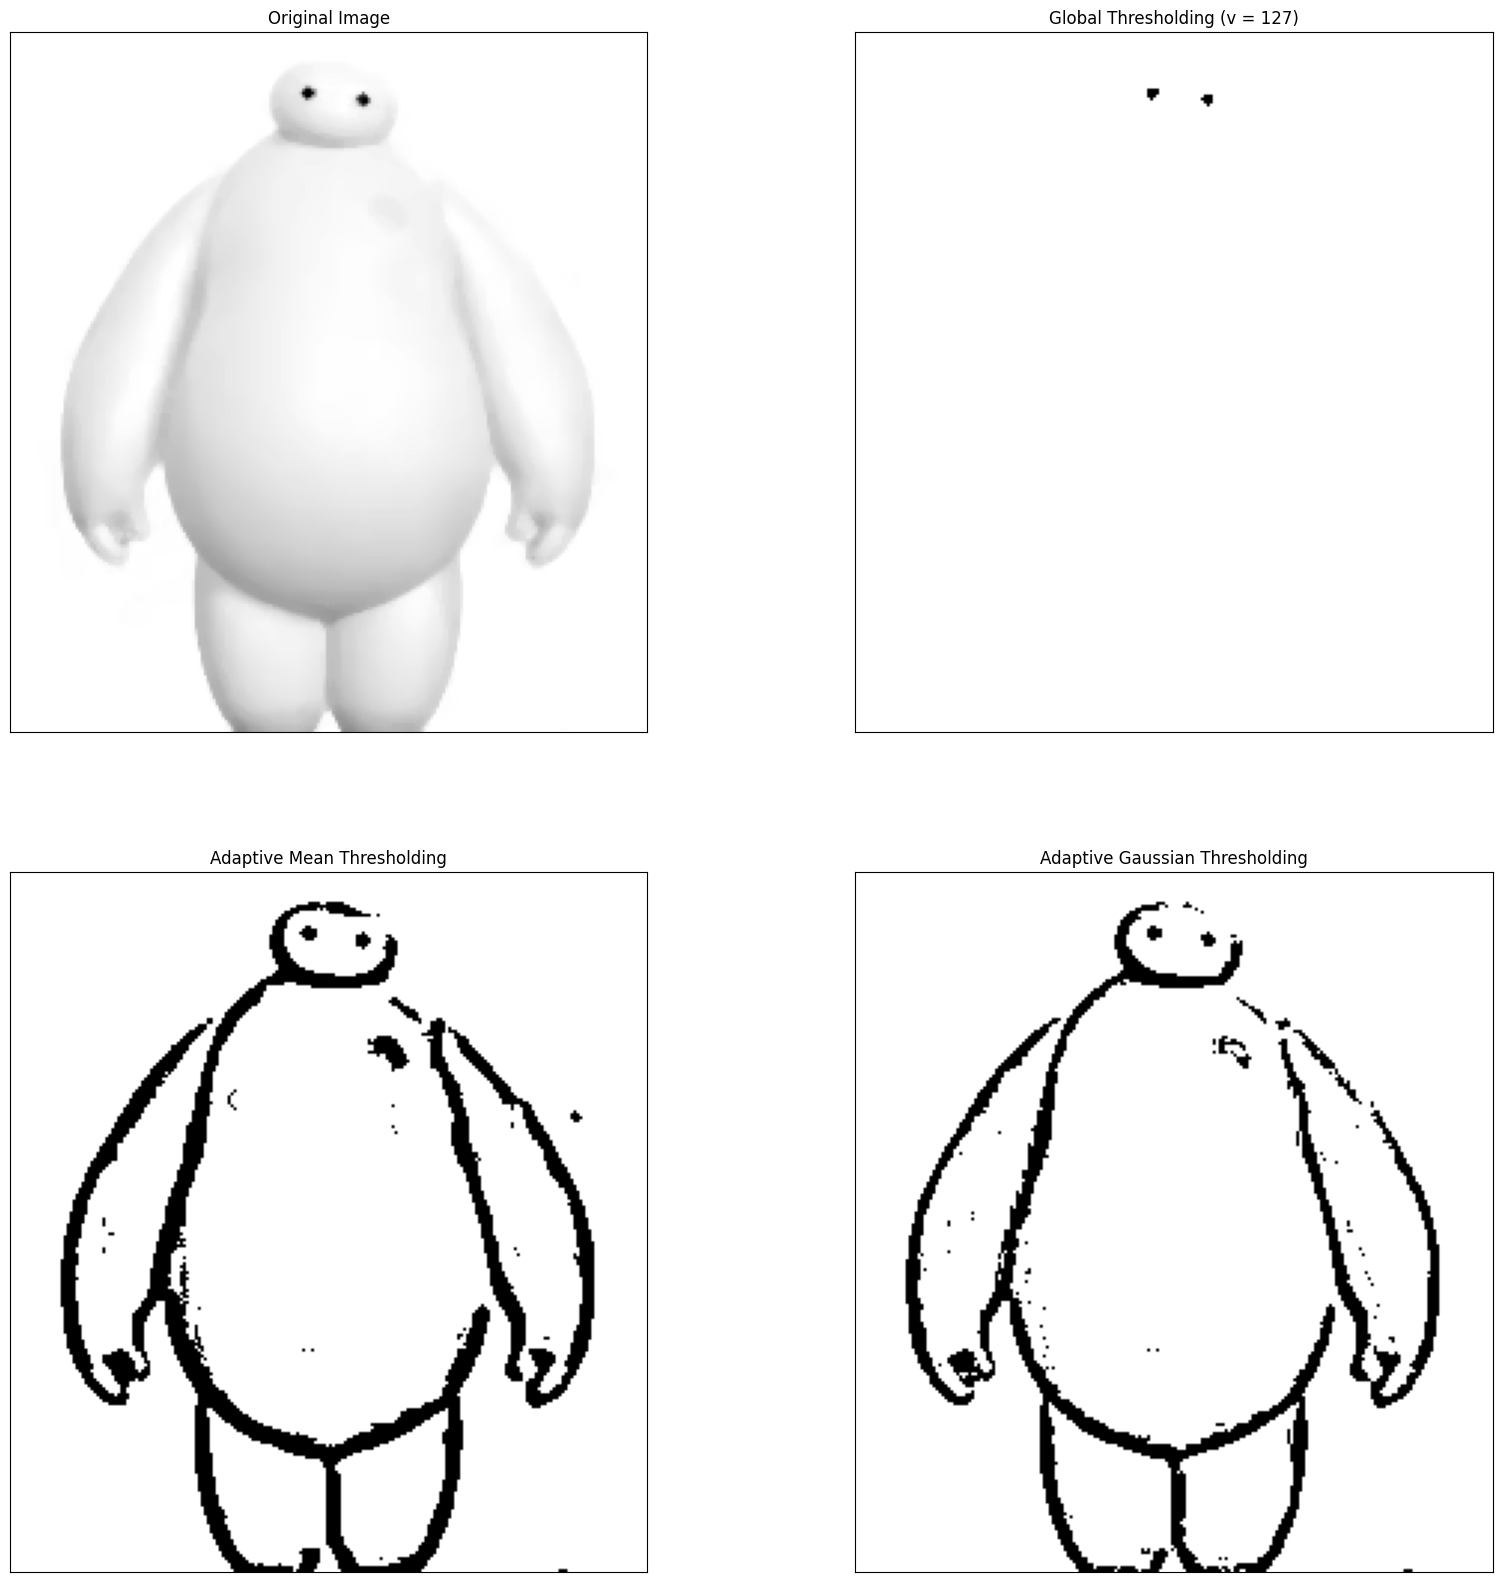

: 

In [7]:
# masih menggunakan variabel img yang sama
#img = cv2.imread('images/baymax.jpg',0)

# digunakan median blur untuk menghaluskan tepi objek pada citra
# ini diperlukan agar thresholding memberikan hasil lebih baik
img = cv2.medianBlur(img,5)

# Lakukan Thresholding
# Binary Threshold
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Adaptive Threshold dengan Mean
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)

# Adaptive Threshold dengan Gaussian
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)


# Plotting
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

# menampilkan hasil
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()